In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
red = pd.read_csv("winequality-red.csv", sep=";")
white = pd.read_csv("winequality-white.csv", sep=";") 

In [4]:
red["type"] = "red"
white["type"] = "white"

In [5]:
print("Red shape:", red.shape)
print("White shape:", white.shape)
print("Red columns:", red.columns.tolist())
print("White columns:", white.columns.tolist())

Red shape: (1599, 13)
White shape: (4898, 13)
Red columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']
White columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [6]:
df = pd.concat([red, white], axis=0, ignore_index=True)

print("Combined shape:", df.shape)
print(df["type"].value_counts())
df.head()

Combined shape: (6497, 13)
type
white    4898
red      1599
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [11]:
df["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
feature_cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

X = df[feature_cols]  # this is what we'll cluster on

# 2. (Later) we'll scale X before clustering


In [14]:
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [15]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [18]:
X.shape

(6497, 11)

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X.shape

(6497, 11)

In [22]:
X_scaled.shape

(6497, 11)

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [25]:
sample_size = 200
X_sample = X_scaled[:sample_size]



In [26]:
Z = linkage(X_sample, method="ward")


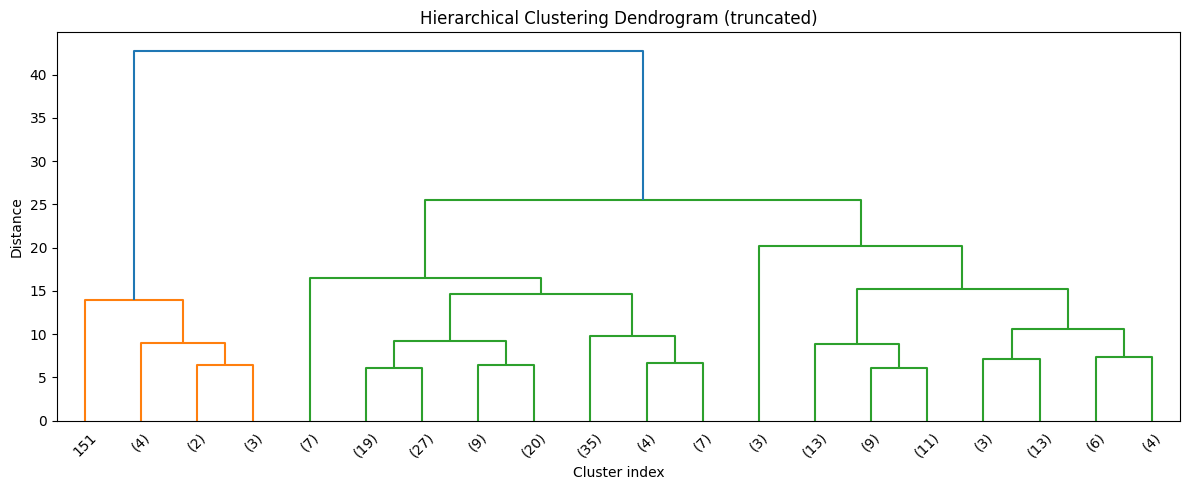

In [27]:
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4

agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric="euclidean",   # instead of affinity="euclidean" [web:90][web:92]
    linkage="ward"        # ward requires euclidean distance [web:72][web:82]
)

cluster_labels = agg.fit_predict(X_scaled)

df["cluster"] = cluster_labels

print("Cluster counts:")
print(df["cluster"].value_counts().sort_index())


Cluster counts:
cluster
0    3628
1     804
2    1128
3     937
Name: count, dtype: int64


In [31]:
cluster_profile = df.groupby("cluster")[feature_cols + ["quality"]].mean()
print(cluster_profile)




         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             6.821100          0.273789     0.315662        4.625896   
1             9.251741          0.411872     0.444925        2.898756   
2             6.968440          0.271981     0.390931       12.306206   
3             7.291462          0.614264     0.134739        2.529296   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.041643            31.006064            126.323043  0.992943   
1         0.104356            17.943408             56.257463  0.997107   
2         0.048912            49.433511            176.222961  0.997451   
3         0.078864            16.697439             53.022412  0.996104   

               pH  sulphates    alcohol   quality  
cluster                                            
0     

In [33]:
type_cluster_counts = df.groupby(["cluster", "type"]).size().unstack(fill_value=0)
print(type_cluster_counts)

type     red  white
cluster            
0         18   3610
1        701    103
2          3   1125
3        877     60


In [34]:
cluster_profile = df.groupby("cluster")[feature_cols + ["quality"]].mean()
cluster_profile


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,6.821100,0.273789,0.315662,4.625896,0.041643,31.006064,126.323043,0.992943,3.210708,0.482952,10.905843,5.982084
1,9.251741,0.411872,0.444925,2.898756,0.104356,17.943408,56.257463,0.997107,3.212413,0.707774,10.495605,5.803483
2,6.968440,0.271981,0.390931,12.306206,0.048912,49.433511,176.222961,0.997451,3.119885,0.507775,9.361953,5.625000
3,7.291462,0.614264,0.134739,2.529296,0.078864,16.697439,53.022412,0.996104,3.372615,0.595176,10.245553,5.430096


In [35]:
type_cluster_counts = df.groupby(["cluster", "type"]).size().unstack(fill_value=0)
type_cluster_counts


type,red,white
cluster,,
0,18,3610
1,701,103
2,3,1125
3,877,60


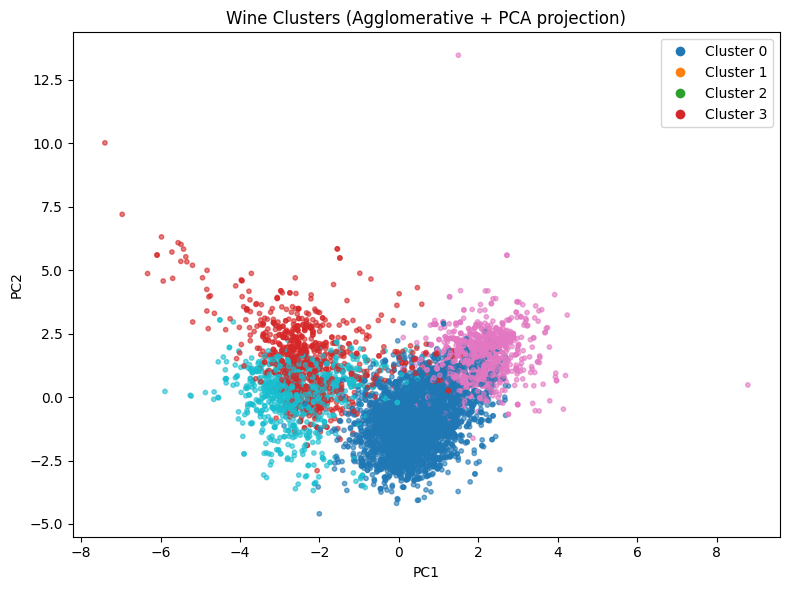

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df["cluster"], cmap="tab10", alpha=0.6, s=10
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Clusters (Agglomerative + PCA projection)")

# Manual legend (no title arg issues)
unique_clusters = np.sort(df["cluster"].unique())
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=plt.cm.tab10(c),
               markersize=8, label=f"Cluster {c}")
    for c in unique_clusters
]
plt.legend(handles=handles, loc="best")

plt.tight_layout()
plt.show()


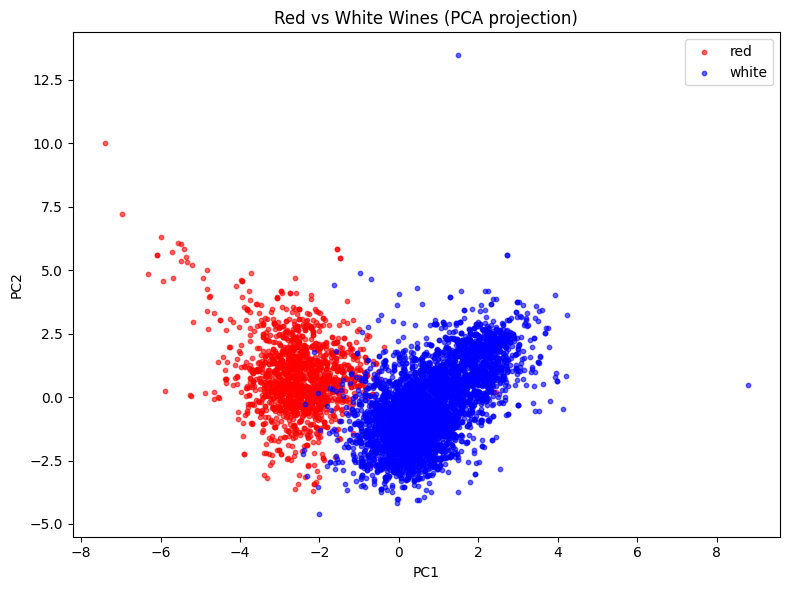

In [39]:
plt.figure(figsize=(8, 6))

colors = {"red": "red", "white": "blue"}
for wine_type, color in colors.items():
    mask = df["type"] == wine_type
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=color, label=wine_type, alpha=0.6, s=10
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Red vs White Wines (PCA projection)")
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    agg_k = AgglomerativeClustering(
        n_clusters=k,
        metric="euclidean",
        linkage="ward"
    )
    labels_k = agg_k.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_k)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.267
k=3, silhouette=0.200
k=4, silhouette=0.207
k=5, silhouette=0.134
k=6, silhouette=0.144
